# Investments-Selected Quant Tools

## This is the notebook for the above course at 2023 spring, university of zurich, aiming to make portfolio investments using machine learning technologies.


In [1]:
# import all the library that we need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing

# import classes from python files
from models import create_model
from data_processing import WindowGenerator
from data_processing import DataProcessor
from utilities import ModelPerformanceVisualizer

# import os 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [2]:
# set up the data.
data_processor = DataProcessor('market_data.xlsx')
train_data, test_data = data_processor.split_train_test(test_size=0.2)
train_df = data_processor.apply_standard_scaling(train_data)
test_df = data_processor.apply_standard_scaling(test_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1833 non-null   datetime64[ns]
 1   EMP     1833 non-null   float64       
 2   PE      1833 non-null   float64       
 3   CAPE    1833 non-null   float64       
 4   DY      1833 non-null   float64       
 5   Rho     1833 non-null   float64       
 6   MOV     1833 non-null   float64       
 7   IR      1833 non-null   float64       
 8   RR      1833 non-null   float64       
 9   Y02     1833 non-null   float64       
 10  Y10     1833 non-null   float64       
 11  STP     1833 non-null   float64       
 12  CF      1833 non-null   float64       
 13  MG      1833 non-null   float64       
 14  RV      1833 non-null   float64       
 15  ED      1833 non-null   float64       
 16  UN      1833 non-null   float64       
 17  GDP     1833 non-null   float64       
 18  M2      

In [4]:
# define sliding window
lf = 52     # look forward
#ks = 26     # kernel size
lw = 1      # label width
lb = 52

# look back
window = WindowGenerator(input_width=lb, label_width=lw, shift=lf, input_columns=['RV', 'MG'], label_columns=['ED'], train_df = train_df)
td = window.make_dataset(train_df, batchsize=150, shuffle=True)


# cross-validation
is_data = td.take(5)
os_data = td.skip(5)

## RNN model

In [5]:


rnn_units = 128
dropout_rate = 0.2

rnn_model = create_model('rnn', rnn_units = 256)

# define the learning rate schedules
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.01, decay_steps=150, decay_rate=0.95, staircase=True)

# Compile the model
rnn_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.SGD(learning_rate=lr_schedule),
              metrics=[tf.metrics.MeanSquaredError()])

rnn_model.run_eagerly = False

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100, mode='min')

# Train the model
history = rnn_model.fit(is_data, validation_data=os_data, epochs=500, batch_size=150, callbacks=[early_stopping])

# Print model summary
rnn_model.summary()


Epoch 1/500
5/5 [==============================] - 6s 736ms/step - loss: 1.3130 - mean_squared_error: 1.3130 - val_loss: 1.1701 - val_mean_squared_error: 1.1701
Epoch 2/500
5/5 [==============================] - 3s 636ms/step - loss: 1.3700 - mean_squared_error: 1.3700 - val_loss: 1.3892 - val_mean_squared_error: 1.3892
Epoch 3/500
5/5 [==============================] - 3s 702ms/step - loss: 1.2643 - mean_squared_error: 1.2643 - val_loss: 1.4182 - val_mean_squared_error: 1.4182
Epoch 4/500
5/5 [==============================] - 3s 665ms/step - loss: 1.3834 - mean_squared_error: 1.3834 - val_loss: 1.3667 - val_mean_squared_error: 1.3667
Epoch 5/500
5/5 [==============================] - 3s 649ms/step - loss: 1.2037 - mean_squared_error: 1.2037 - val_loss: 1.3875 - val_mean_squared_error: 1.3875
Epoch 6/500
5/5 [==============================] - 3s 556ms/step - loss: 1.3069 - mean_squared_error: 1.3069 - val_loss: 1.3130 - val_mean_squared_error: 1.3130
Epoch 7/500
5/5 [=================

5/5 [==============================] - 3s 689ms/step - loss: 1.0300 - mean_squared_error: 1.0300 - val_loss: 1.1825 - val_mean_squared_error: 1.1825
Epoch 52/500
5/5 [==============================] - 3s 693ms/step - loss: 1.1478 - mean_squared_error: 1.1478 - val_loss: 0.9826 - val_mean_squared_error: 0.9826
Epoch 53/500
5/5 [==============================] - 3s 679ms/step - loss: 1.0100 - mean_squared_error: 1.0100 - val_loss: 1.1507 - val_mean_squared_error: 1.1507
Epoch 54/500
5/5 [==============================] - 3s 692ms/step - loss: 0.9135 - mean_squared_error: 0.9135 - val_loss: 1.1389 - val_mean_squared_error: 1.1389
Epoch 55/500
5/5 [==============================] - 3s 667ms/step - loss: 1.1727 - mean_squared_error: 1.1727 - val_loss: 1.0161 - val_mean_squared_error: 1.0161
Epoch 56/500
5/5 [==============================] - 3s 680ms/step - loss: 1.2460 - mean_squared_error: 1.2460 - val_loss: 1.2508 - val_mean_squared_error: 1.2508
Epoch 57/500
5/5 [=======================

Epoch 102/500
5/5 [==============================] - 3s 696ms/step - loss: 0.9474 - mean_squared_error: 0.9474 - val_loss: 0.9566 - val_mean_squared_error: 0.9566
Epoch 103/500
5/5 [==============================] - 3s 640ms/step - loss: 1.0348 - mean_squared_error: 1.0348 - val_loss: 1.1614 - val_mean_squared_error: 1.1614
Epoch 104/500
5/5 [==============================] - 3s 657ms/step - loss: 0.9992 - mean_squared_error: 0.9992 - val_loss: 0.9765 - val_mean_squared_error: 0.9765
Epoch 105/500
5/5 [==============================] - 3s 691ms/step - loss: 1.0890 - mean_squared_error: 1.0890 - val_loss: 1.0093 - val_mean_squared_error: 1.0093
Epoch 106/500
5/5 [==============================] - 3s 689ms/step - loss: 1.0117 - mean_squared_error: 1.0117 - val_loss: 0.8222 - val_mean_squared_error: 0.8222
Epoch 107/500
5/5 [==============================] - 3s 685ms/step - loss: 0.9130 - mean_squared_error: 0.9130 - val_loss: 0.8894 - val_mean_squared_error: 0.8894
Epoch 108/500
5/5 [===

5/5 [==============================] - 3s 729ms/step - loss: 0.9622 - mean_squared_error: 0.9622 - val_loss: 0.8506 - val_mean_squared_error: 0.8506
Epoch 153/500
5/5 [==============================] - 3s 704ms/step - loss: 1.0216 - mean_squared_error: 1.0216 - val_loss: 0.9660 - val_mean_squared_error: 0.9660
Epoch 154/500
5/5 [==============================] - 3s 668ms/step - loss: 0.8372 - mean_squared_error: 0.8372 - val_loss: 0.9989 - val_mean_squared_error: 0.9989
Epoch 155/500
5/5 [==============================] - 3s 700ms/step - loss: 0.9437 - mean_squared_error: 0.9437 - val_loss: 0.7474 - val_mean_squared_error: 0.7474
Epoch 156/500
5/5 [==============================] - 3s 659ms/step - loss: 0.8915 - mean_squared_error: 0.8915 - val_loss: 0.8762 - val_mean_squared_error: 0.8762
Epoch 157/500
5/5 [==============================] - 3s 692ms/step - loss: 0.8087 - mean_squared_error: 0.8087 - val_loss: 0.8554 - val_mean_squared_error: 0.8554
Epoch 158/500
5/5 [=================

5/5 [==============================] - 3s 668ms/step - loss: 0.9004 - mean_squared_error: 0.9004 - val_loss: 0.9165 - val_mean_squared_error: 0.9165
Epoch 203/500
5/5 [==============================] - 3s 621ms/step - loss: 0.8948 - mean_squared_error: 0.8948 - val_loss: 0.9481 - val_mean_squared_error: 0.9481
Epoch 204/500
5/5 [==============================] - 3s 685ms/step - loss: 0.9985 - mean_squared_error: 0.9985 - val_loss: 0.9661 - val_mean_squared_error: 0.9661
Epoch 205/500
5/5 [==============================] - 3s 666ms/step - loss: 0.9944 - mean_squared_error: 0.9944 - val_loss: 1.0915 - val_mean_squared_error: 1.0915
Epoch 206/500
5/5 [==============================] - 3s 656ms/step - loss: 0.8204 - mean_squared_error: 0.8204 - val_loss: 1.0702 - val_mean_squared_error: 1.0702
Epoch 207/500
5/5 [==============================] - 3s 688ms/step - loss: 0.8552 - mean_squared_error: 0.8552 - val_loss: 0.8504 - val_mean_squared_error: 0.8504
Epoch 208/500
5/5 [=================

5/5 [==============================] - 3s 617ms/step - loss: 0.8820 - mean_squared_error: 0.8820 - val_loss: 0.8907 - val_mean_squared_error: 0.8907
Epoch 253/500
5/5 [==============================] - 3s 666ms/step - loss: 0.8738 - mean_squared_error: 0.8738 - val_loss: 0.8673 - val_mean_squared_error: 0.8673
Epoch 254/500
5/5 [==============================] - 3s 673ms/step - loss: 0.9240 - mean_squared_error: 0.9240 - val_loss: 0.8938 - val_mean_squared_error: 0.8938
Epoch 255/500
5/5 [==============================] - 3s 693ms/step - loss: 0.8424 - mean_squared_error: 0.8424 - val_loss: 0.8740 - val_mean_squared_error: 0.8740
Epoch 256/500
5/5 [==============================] - 3s 547ms/step - loss: 0.8589 - mean_squared_error: 0.8589 - val_loss: 0.7552 - val_mean_squared_error: 0.7552
Epoch 257/500
5/5 [==============================] - 3s 689ms/step - loss: 0.7303 - mean_squared_error: 0.7303 - val_loss: 1.0520 - val_mean_squared_error: 1.0520
Epoch 258/500
5/5 [=================

5/5 [==============================] - 3s 705ms/step - loss: 0.9708 - mean_squared_error: 0.9708 - val_loss: 0.8365 - val_mean_squared_error: 0.8365
Epoch 303/500
5/5 [==============================] - 3s 666ms/step - loss: 0.9421 - mean_squared_error: 0.9421 - val_loss: 0.8661 - val_mean_squared_error: 0.8661
Epoch 304/500
5/5 [==============================] - 3s 684ms/step - loss: 0.9022 - mean_squared_error: 0.9022 - val_loss: 0.8983 - val_mean_squared_error: 0.8983
Epoch 305/500
5/5 [==============================] - 3s 687ms/step - loss: 0.9280 - mean_squared_error: 0.9280 - val_loss: 0.8641 - val_mean_squared_error: 0.8641
Epoch 306/500
5/5 [==============================] - 3s 648ms/step - loss: 0.8660 - mean_squared_error: 0.8660 - val_loss: 0.9338 - val_mean_squared_error: 0.9338
Epoch 307/500
5/5 [==============================] - 3s 675ms/step - loss: 0.8326 - mean_squared_error: 0.8326 - val_loss: 0.9846 - val_mean_squared_error: 0.9846
Epoch 308/500
5/5 [=================

5/5 [==============================] - 3s 665ms/step - loss: 0.8498 - mean_squared_error: 0.8498 - val_loss: 0.9471 - val_mean_squared_error: 0.9471
Epoch 353/500
5/5 [==============================] - 3s 687ms/step - loss: 0.9458 - mean_squared_error: 0.9458 - val_loss: 1.0014 - val_mean_squared_error: 1.0014
Epoch 354/500
5/5 [==============================] - 3s 710ms/step - loss: 0.8936 - mean_squared_error: 0.8936 - val_loss: 0.8235 - val_mean_squared_error: 0.8235
Epoch 355/500
5/5 [==============================] - 3s 663ms/step - loss: 0.9329 - mean_squared_error: 0.9329 - val_loss: 0.9377 - val_mean_squared_error: 0.9377
Epoch 356/500
5/5 [==============================] - 3s 673ms/step - loss: 0.8225 - mean_squared_error: 0.8225 - val_loss: 0.8187 - val_mean_squared_error: 0.8187
Epoch 357/500
5/5 [==============================] - 3s 568ms/step - loss: 0.9483 - mean_squared_error: 0.9483 - val_loss: 0.8531 - val_mean_squared_error: 0.8531
Model: "rnn_model_1"
_______________

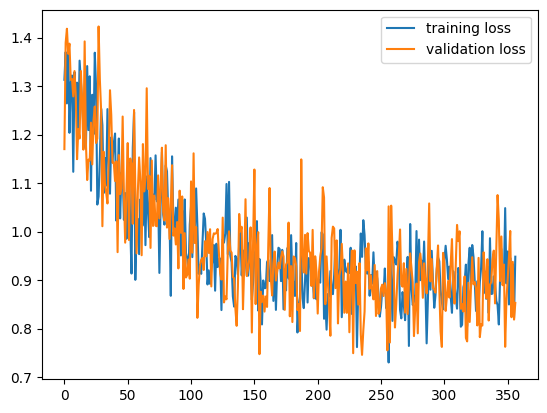

1/1 [==============================] - 2s 2s/step


C:\Users\Guo_y\Desktop\Investment-Selected Tools\Session 12\project\utilities.py:51: RuntimeWarning: invalid value encountered in float_scalars
  sr = np.mean(tmp.numpy()) / np.std(tmp.numpy()) * tf.sqrt(52.00)


1/1 [==============================] - 0s 367ms/step


C:\Users\Guo_y\Desktop\Investment-Selected Tools\Session 12\project\utilities.py:80: RuntimeWarning: invalid value encountered in float_scalars
  sr = np.mean(tmp.numpy()) / np.std(tmp.numpy()) * tf.sqrt(52.00)


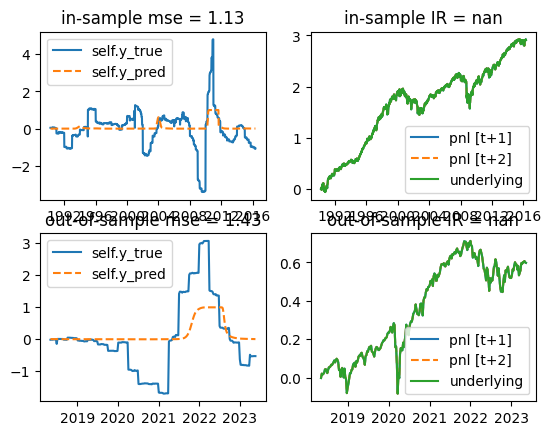

In [6]:
eval_train_rnn = window.make_dataset(train_df, batchsize=train_df.shape[0], shuffle=False)
eval_test_rnn = window.make_dataset(test_df, batchsize=test_df.shape[0], shuffle=False)
# Create an instance of the ModelPerformanceVisualizer class
visualizer = ModelPerformanceVisualizer(rnn_model, eval_train_rnn, eval_test_rnn, train_df, test_df, train_data, test_data, lb, lf)

# Plot loss history
visualizer.plot_loss(history)

# Plot in-sample performance
visualizer.plot_in_sample_performance()

# Plot in-sample trading strategy
visualizer.plot_in_sample_trading_strategy()

# Plot out-of-sample performance
visualizer.plot_out_of_sample_performance()

# Plot out-of-sample trading strategy
visualizer.plot_out_of_sample_trading_strategy()

# Display all plots
visualizer.show_plots()